<a href="https://colab.research.google.com/github/pedroeli07/temperatura_media_insights/blob/an%C3%A1lise-de-pa%C3%ADses-atrav%C3%A9s-das-cidades/temperatura_media_insights(analise_de_pa%C3%ADses_atrav%C3%A9s_das_cidades).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
# Importe a biblioteca google.colab.drive
import google.colab.drive

# Monte o Google Drive
google.colab.drive.mount('/content/drive')

path = '/content/drive/My Drive/df_FILTRADO.csv'
df_copy = pd.read_csv(path)

# Calcular a média da coluna 'Variação de Temperatura Média'
media_variacao_temp = df_copy['Variação de Temperatura Média'].mean()
# Filtrar as linhas onde 'Variação de Temperatura Média' é superior à média
dados_acima_da_media = df_copy[df_copy['Variação de Temperatura Média'] > media_variacao_temp]
# Contar a frequência de cada país
contagem_paises = dados_acima_da_media['País'].value_counts()
# Criar um DataFrame a partir da Série contagem_paises
df_resultado_acima = pd.DataFrame({'País': contagem_paises.index, 'Cidades Acima da Média': contagem_paises.values})
# Calcular o total de cidades
total_cidades = df_resultado_acima['Cidades Acima da Média'].sum()
# Calcular a proporção para cada país
df_resultado_acima['Proporção Acima da Média'] = ((df_resultado_acima['Cidades Acima da Média'] / total_cidades) * 100).round(2).astype(str) + ' %'
# Calcular as linhas onde 'Variação de Temperatura Média' é inferior à média
dados_abaixo_da_media = df_copy[df_copy['Variação de Temperatura Média'] <= media_variacao_temp]
# Contar a frequência de cada país
contagem_paises_abaixo = dados_abaixo_da_media['País'].value_counts()
# Criar um DataFrame a partir da Série contagem_paises_abaixo
df_resultado_abaixo = pd.DataFrame({'País': contagem_paises_abaixo.index, 'Cidades Abaixo da Média': contagem_paises_abaixo.values})
# Calcular a proporção para cada país
df_resultado_abaixo['Proporção Abaixo da Média'] = ((df_resultado_abaixo['Cidades Abaixo da Média'] / total_cidades) * 100).round(2).astype(str) + ' %'
# Exibir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)  # Configuração para exibir todas as linhas
# Realizar junção externa
df_merged_resultados = df_resultado_acima.merge(df_resultado_abaixo, on='País', how='outer')
# Substituir NaN por 0 nas colunas de contagem
df_merged_resultados[['Cidades Acima da Média', 'Cidades Abaixo da Média']] = df_merged_resultados[['Cidades Acima da Média', 'Cidades Abaixo da Média']].fillna(0)
# Calcular a proporção para cada país após a junção externa
df_merged_resultados['Proporção Acima da Média'] = ((df_merged_resultados['Cidades Acima da Média'] / total_cidades) * 100).round(2).astype(str) + ' %'
df_merged_resultados['Proporção Abaixo da Média'] = ((df_merged_resultados['Cidades Abaixo da Média'] / total_cidades) * 100).round(2).astype(str) + ' %'

# Exibir o DataFrame resultante
df_merged_resultados.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,País,Cidades Acima da Média,Proporção Acima da Média,Cidades Abaixo da Média,Proporção Abaixo da Média
0,China,162.0,11.51 %,209.0,14.85 %
1,United States,143.0,10.16 %,91.0,6.47 %
2,Russia,133.0,9.45 %,23.0,1.63 %
3,Japan,94.0,6.68 %,81.0,5.76 %
4,Nigeria,90.0,6.4 %,0.0,0.0 %


In [197]:
# Somar os valores na coluna 'Variação de Temperatura Média' no df_copy para cada país
soma_variacao_temp_por_pais = df_copy.groupby('País')['Variação de Temperatura Média'].sum()
# Calcular a média da 'Variação de Temperatura Média' para cada país
media_variacao_temp_por_pais = df_copy.groupby('País')['Variação de Temperatura Média'].mean()
# Adicionar os resultados ao df_merged_resultados
#df_merged_resultados['Soma Variação Temp Média'] = soma_variacao_temp_por_pais[df_merged_resultados['País']].values
df_merged_resultados['Média Variação Temp Média'] = media_variacao_temp_por_pais[df_merged_resultados['País']].values
# Somar as quantidades de cidades abaixo e acima da média para cada país
df_merged_resultados['Total de Cidades'] = df_merged_resultados['Cidades Abaixo da Média'] + df_merged_resultados['Cidades Acima da Média']
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados = df_merged_resultados.sort_values(by='Total de Cidades', ascending=False)
# Substituir o nome do país
df_merged_resultados['País'] = df_merged_resultados['País'].replace('Congo (Democratic Republic Of The)', 'Congo (Dem Rep)')
# Exibir o DataFrame resultante
display(df_merged_resultados)

,País,Cidades Acima da Média,Proporção Acima da Média,Cidades Abaixo da Média,Proporção Abaixo da Média,Média Variação Temp Média,Total de Cidades
18,India,15.0,1.07 %,375.0,26.65 %,0.955585,390.0
0,China,162.0,11.51 %,209.0,14.85 %,1.156301,371.0
1,United States,143.0,10.16 %,91.0,6.47 %,1.457519,234.0
12,Brazil,30.0,2.13 %,190.0,13.5 %,1.058342,220.0
3,Japan,94.0,6.68 %,81.0,5.76 %,1.256159,175.0
2,Russia,133.0,9.45 %,23.0,1.63 %,1.785966,156.0
53,Indonesia,4.0,0.28 %,139.0,9.88 %,1.055134,143.0
9,Mexico,37.0,2.63 %,58.0,4.12 %,1.263349,95.0
4,Nigeria,90.0,6.4 %,0.0,0.0 %,1.529001,90.0
40,Germany,6.0,0.43 %,75.0,5.33 %,1.071511,81.0


In [198]:
# Excluir linhas com 'Total de Cidades' menor que 5
df_merged_resultados = df_merged_resultados.loc[df_merged_resultados['Total de Cidades'] >= 5]
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados = df_merged_resultados.sort_values(by='Média Variação Temp Média', ascending=False)
# Calcular a proporção de Cidades Abaixo da Média em relação ao Total de Cidades
df_merged_resultados['Proporção de Cidades do País Abaixo da Média'] = (df_merged_resultados['Cidades Abaixo da Média'] / df_merged_resultados['Total de Cidades'] * 100).round(2).astype(str) + ' %'
# Calcular a proporção de Cidades Acima da Média em relação ao Total de Cidades
df_merged_resultados['Proporção de Cidades do País Acima da Média'] = (df_merged_resultados['Cidades Acima da Média'] / df_merged_resultados['Total de Cidades'] * 100).round(2).astype(str) + ' %'
# Reorganizar as colunas do DataFrame
df_merged_resultados = df_merged_resultados[['País', 'Média Variação Temp Média', 'Total de Cidades', 'Cidades Abaixo da Média', 'Cidades Acima da Média', 'Proporção Abaixo da Média', 'Proporção Acima da Média', 'Proporção de Cidades do País Abaixo da Média', 'Proporção de Cidades do País Acima da Média']]
# Exibir o DataFrame resultante
display(df_merged_resultados)

,País,Média Variação Temp Média,Total de Cidades,Cidades Abaixo da Média,Cidades Acima da Média,Proporção Abaixo da Média,Proporção Acima da Média,Proporção de Cidades do País Abaixo da Média,Proporção de Cidades do País Acima da Média
30,Uzbekistan,2.156063,8.0,0.0,8.0,0.0 %,0.57 %,0.0 %,100.0 %
5,Iran,2.129853,66.0,0.0,66.0,0.0 %,4.69 %,0.0 %,100.0 %
15,Canada,1.896790,25.0,4.0,21.0,0.28 %,1.49 %,16.0 %,84.0 %
14,Ukraine,1.888143,24.0,0.0,24.0,0.0 %,1.71 %,0.0 %,100.0 %
21,Kazakhstan,1.806991,15.0,2.0,13.0,0.14 %,0.92 %,13.33 %,86.67 %
2,Russia,1.785966,156.0,23.0,133.0,1.63 %,9.45 %,14.74 %,85.26 %
36,Saudi Arabia,1.728989,7.0,0.0,7.0,0.0 %,0.5 %,0.0 %,100.0 %
13,Romania,1.688579,25.0,0.0,25.0,0.0 %,1.78 %,0.0 %,100.0 %
38,Belarus,1.634483,8.0,1.0,7.0,0.07 %,0.5 %,12.5 %,87.5 %
49,Bosnia And Herzegovina,1.608910,5.0,0.0,5.0,0.0 %,0.36 %,0.0 %,100.0 %


In [199]:
# Excluir linhas com 'Total de Cidades' menor que 20
df_merged_resultados2 = df_merged_resultados.loc[df_merged_resultados['Total de Cidades'] >= 20]
display(df_merged_resultados2)

,País,Média Variação Temp Média,Total de Cidades,Cidades Abaixo da Média,Cidades Acima da Média,Proporção Abaixo da Média,Proporção Acima da Média,Proporção de Cidades do País Abaixo da Média,Proporção de Cidades do País Acima da Média
5,Iran,2.129853,66.0,0.0,66.0,0.0 %,4.69 %,0.0 %,100.0 %
15,Canada,1.896790,25.0,4.0,21.0,0.28 %,1.49 %,16.0 %,84.0 %
14,Ukraine,1.888143,24.0,0.0,24.0,0.0 %,1.71 %,0.0 %,100.0 %
2,Russia,1.785966,156.0,23.0,133.0,1.63 %,9.45 %,14.74 %,85.26 %
13,Romania,1.688579,25.0,0.0,25.0,0.0 %,1.78 %,0.0 %,100.0 %
4,Nigeria,1.529001,90.0,0.0,90.0,0.0 %,6.4 %,0.0 %,100.0 %
6,Turkey,1.500798,51.0,0.0,51.0,0.0 %,3.62 %,0.0 %,100.0 %
1,United States,1.457519,234.0,91.0,143.0,6.47 %,10.16 %,38.89 %,61.11 %
7,Italy,1.429415,42.0,2.0,40.0,0.14 %,2.84 %,4.76 %,95.24 %
8,Spain,1.351305,45.0,8.0,37.0,0.57 %,2.63 %,17.78 %,82.22 %


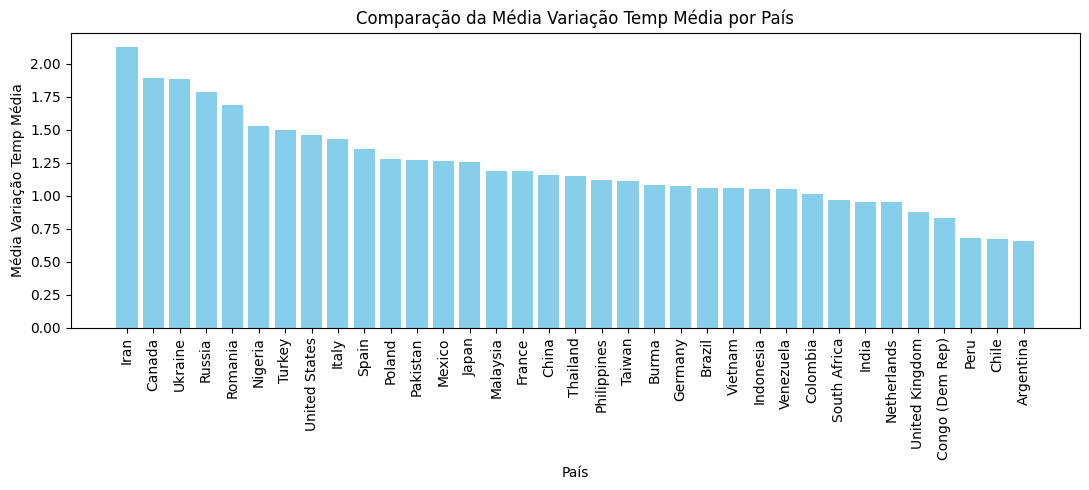

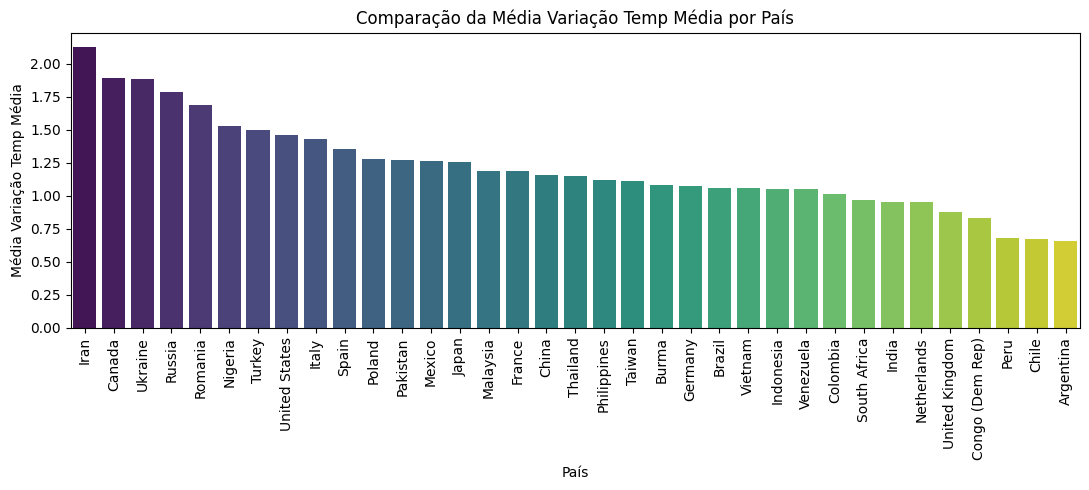

In [200]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados2 = df_merged_resultados2.sort_values(by='Média Variação Temp Média', ascending=False)

import matplotlib.pyplot as plt
# Criar um gráfico de barras
plt.figure(figsize=(11, 5))
plt.bar(df_merged_resultados2['País'], df_merged_resultados2['Média Variação Temp Média'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Média Variação Temp Média')
plt.title('Comparação da Média Variação Temp Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

import seaborn as sns
# Criar um gráfico de barras usando seaborn
plt.figure(figsize=(11, 5))
sns.barplot(x='País', y='Média Variação Temp Média', data=df_merged_resultados2, palette='viridis', dodge=False)
# Remover a legenda
plt.legend([], [], frameon=False)
plt.xlabel('País')
plt.ylabel('Média Variação Temp Média')
plt.title('Comparação da Média Variação Temp Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

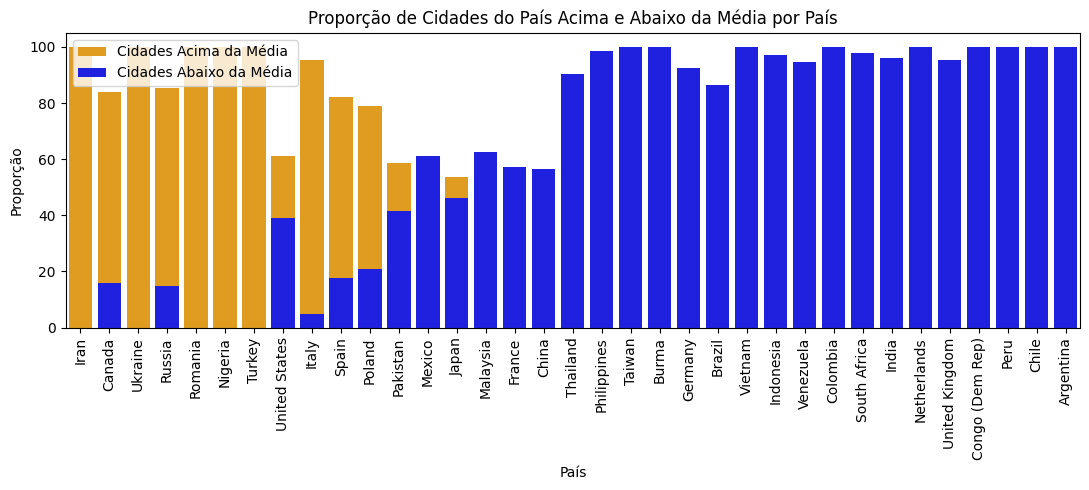

In [201]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados2 = df_merged_resultados2.sort_values(by='Média Variação Temp Média', ascending=False)
# Remova o percent sign das colunas 'Proporção de Cidades do País Acima da Média' e 'Proporção de Cidades do País Abaixo da Média'
df_merged_resultados2['Proporção de Cidades do País Acima da Média'] = df_merged_resultados2['Proporção de Cidades do País Acima da Média'].str.rstrip(' %').astype(float)
df_merged_resultados2['Proporção de Cidades do País Abaixo da Média'] = df_merged_resultados2['Proporção de Cidades do País Abaixo da Média'].str.rstrip(' %').astype(float)
# Configurar o tamanho do gráfico
plt.figure(figsize=(11, 5))
# Barras para Cidades Acima da Média
sns.barplot(x='País', y='Proporção de Cidades do País Acima da Média', data=df_merged_resultados2, color='orange', label='Cidades Acima da Média')
# Barras para Cidades Abaixo da Média
sns.barplot(x='País', y='Proporção de Cidades do País Abaixo da Média', data=df_merged_resultados2, color='blue', label='Cidades Abaixo da Média')
plt.xlabel('País')
plt.ylabel('Proporção')
plt.title('Proporção de Cidades do País Acima e Abaixo da Média por País')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()



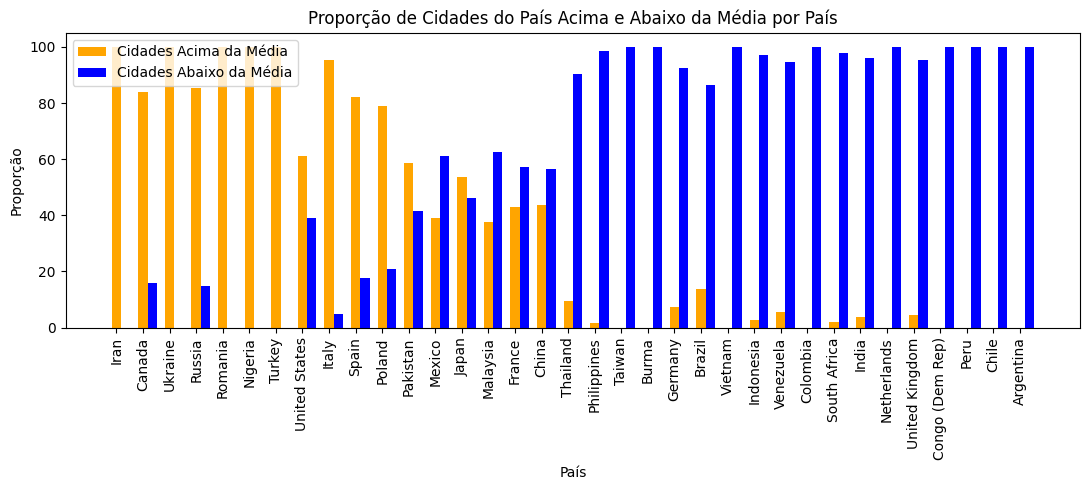

In [202]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados2 = df_merged_resultados2.sort_values(by='Média Variação Temp Média', ascending=False)
# Largura das barras
bar_width = 0.35
# Calcular as posições das barras
pos_acima = range(len(df_merged_resultados2))
pos_abaixo = [p + bar_width for p in pos_acima]
# Configurar o tamanho do gráfico
plt.figure(figsize=(11, 5))
# Barras para Cidades Acima da Média
plt.bar(pos_acima, df_merged_resultados2['Proporção de Cidades do País Acima da Média'], color='orange', label='Cidades Acima da Média', width=bar_width)
# Barras para Cidades Abaixo da Média
plt.bar(pos_abaixo, df_merged_resultados2['Proporção de Cidades do País Abaixo da Média'], color='blue', label='Cidades Abaixo da Média', width=bar_width)

plt.xlabel('País')
plt.ylabel('Proporção')
plt.title('Proporção de Cidades do País Acima e Abaixo da Média por País')
plt.xticks(pos_acima, df_merged_resultados2['País'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [203]:
# Excluir linhas com 'Total de Cidades' menor que 50
df_merged_resultados3 = df_merged_resultados.loc[df_merged_resultados['Total de Cidades'] >= 50]
display(df_merged_resultados3)

,País,Média Variação Temp Média,Total de Cidades,Cidades Abaixo da Média,Cidades Acima da Média,Proporção Abaixo da Média,Proporção Acima da Média,Proporção de Cidades do País Abaixo da Média,Proporção de Cidades do País Acima da Média
5,Iran,2.129853,66.0,0.0,66.0,0.0 %,4.69 %,0.0 %,100.0 %
2,Russia,1.785966,156.0,23.0,133.0,1.63 %,9.45 %,14.74 %,85.26 %
4,Nigeria,1.529001,90.0,0.0,90.0,0.0 %,6.4 %,0.0 %,100.0 %
6,Turkey,1.500798,51.0,0.0,51.0,0.0 %,3.62 %,0.0 %,100.0 %
1,United States,1.457519,234.0,91.0,143.0,6.47 %,10.16 %,38.89 %,61.11 %
10,Pakistan,1.275267,58.0,24.0,34.0,1.71 %,2.42 %,41.38 %,58.62 %
9,Mexico,1.263349,95.0,58.0,37.0,4.12 %,2.63 %,61.05 %,38.95 %
3,Japan,1.256159,175.0,81.0,94.0,5.76 %,6.68 %,46.29 %,53.71 %
0,China,1.156301,371.0,209.0,162.0,14.85 %,11.51 %,56.33 %,43.67 %
86,Philippines,1.116883,64.0,63.0,1.0,4.48 %,0.07 %,98.44 %,1.56 %


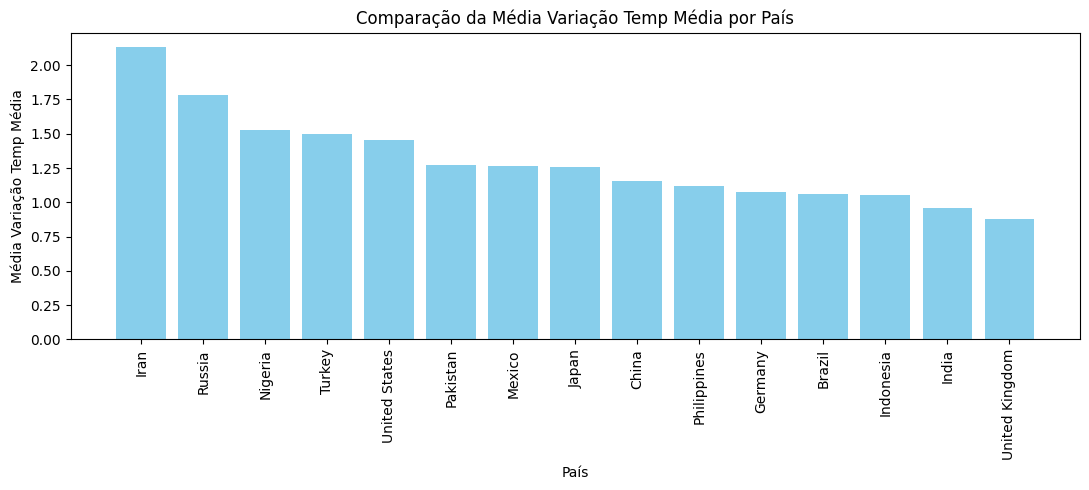

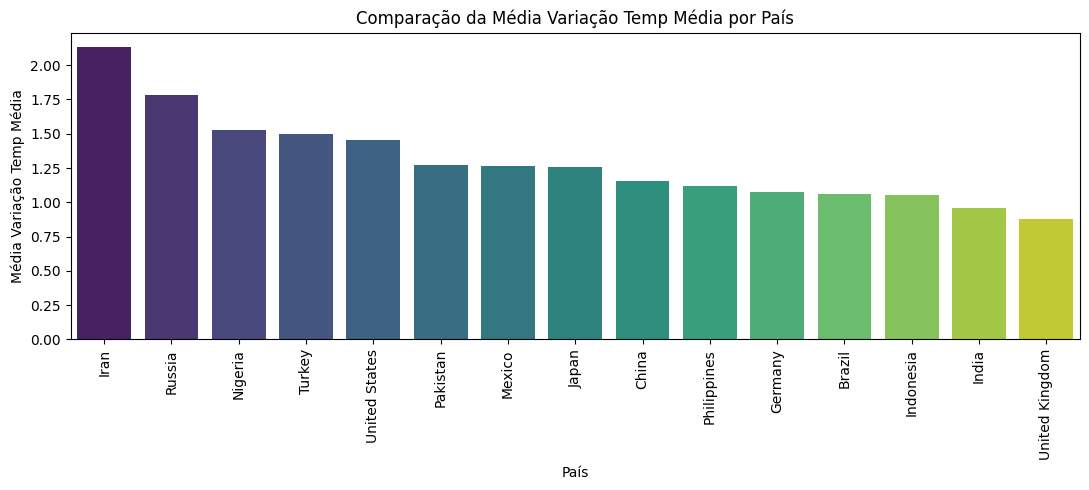

In [204]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados3 = df_merged_resultados3.sort_values(by='Média Variação Temp Média', ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(11, 5))
plt.bar(df_merged_resultados3['País'], df_merged_resultados3['Média Variação Temp Média'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Média Variação Temp Média')
plt.title('Comparação da Média Variação Temp Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Criar um gráfico de barras usando seaborn
plt.figure(figsize=(11, 5))
sns.barplot(x='País', y='Média Variação Temp Média', data=df_merged_resultados3, palette='viridis', dodge=False)
# Remover a legenda
plt.legend([], [], frameon=False)
plt.xlabel('País')
plt.ylabel('Média Variação Temp Média')
plt.title('Comparação da Média Variação Temp Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

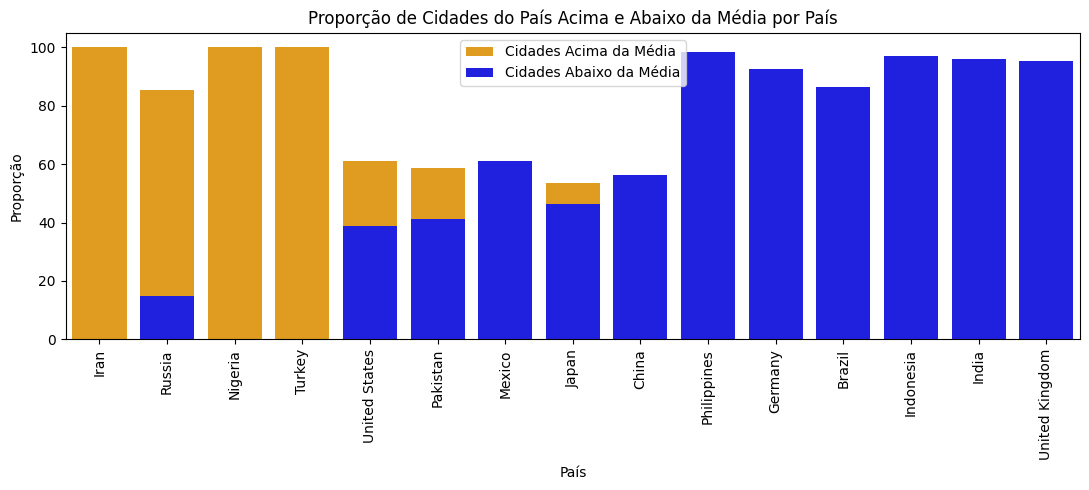

In [205]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados3 = df_merged_resultados3.sort_values(by='Média Variação Temp Média', ascending=False)
# Remova o percent sign das colunas 'Proporção de Cidades do País Acima da Média' e 'Proporção de Cidades do País Abaixo da Média'
df_merged_resultados3['Proporção de Cidades do País Acima da Média'] = df_merged_resultados3['Proporção de Cidades do País Acima da Média'].str.rstrip(' %').astype(float)
df_merged_resultados3['Proporção de Cidades do País Abaixo da Média'] = df_merged_resultados3['Proporção de Cidades do País Abaixo da Média'].str.rstrip(' %').astype(float)
# Configurar o tamanho do gráfico
plt.figure(figsize=(11, 5))
# Barras para Cidades Acima da Média
sns.barplot(x='País', y='Proporção de Cidades do País Acima da Média', data=df_merged_resultados3, color='orange', label='Cidades Acima da Média')
# Barras para Cidades Abaixo da Média
sns.barplot(x='País', y='Proporção de Cidades do País Abaixo da Média', data=df_merged_resultados3, color='blue', label='Cidades Abaixo da Média')
plt.xlabel('País')
plt.ylabel('Proporção')
plt.title('Proporção de Cidades do País Acima e Abaixo da Média por País')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

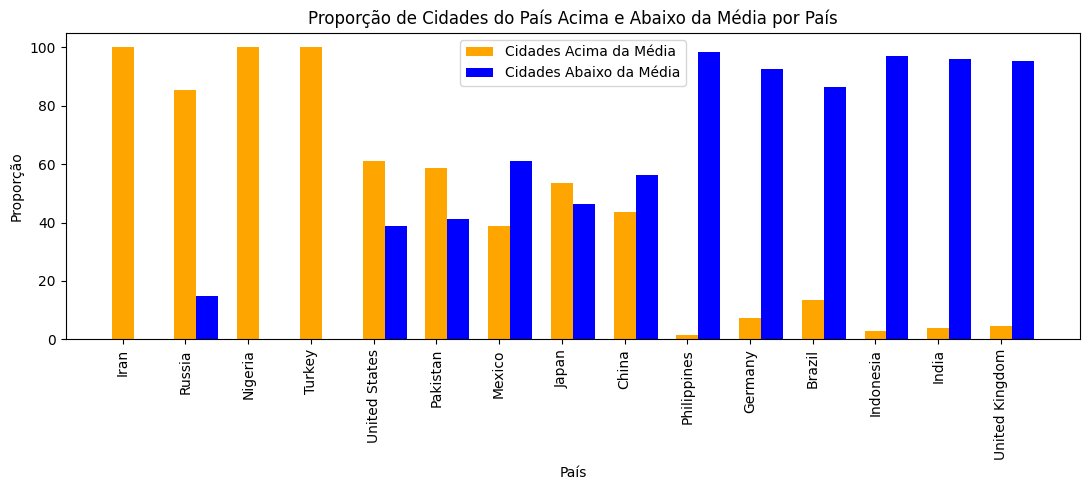

In [206]:
# Ordenar o DataFrame por 'Média Variação Temp Média' em ordem decrescente
df_merged_resultados3 = df_merged_resultados3.sort_values(by='Média Variação Temp Média', ascending=False)
# Largura das barras
bar_width = 0.35
# Calcular as posições das barras
pos_acima = range(len(df_merged_resultados3))
pos_abaixo = [p + bar_width for p in pos_acima]
# Configurar o tamanho do gráfico
plt.figure(figsize=(11, 5))
# Barras para Cidades Acima da Média
plt.bar(pos_acima, df_merged_resultados3['Proporção de Cidades do País Acima da Média'], color='orange', label='Cidades Acima da Média', width=bar_width)
# Barras para Cidades Abaixo da Média
plt.bar(pos_abaixo, df_merged_resultados3['Proporção de Cidades do País Abaixo da Média'], color='blue', label='Cidades Abaixo da Média', width=bar_width)

plt.xlabel('País')
plt.ylabel('Proporção')
plt.title('Proporção de Cidades do País Acima e Abaixo da Média por País')
plt.xticks(pos_acima, df_merged_resultados3['País'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [207]:
# Somar todos os valores na coluna 'Cidades Acima da Média'
soma_cidades_acima_da_media = df_resultado_acima['Cidades Acima da Média'].sum()

# Somar todos os valores na coluna 'Cidades Abaixo da Média'
soma_cidades_abaixo_da_media = df_resultado_abaixo['Cidades Abaixo da Média'].sum()

# Exibir a soma de cidades acima e abaixo da média
print("Soma de cidades acima da média:", soma_cidades_acima_da_media)
print("Soma de cidades abaixo da média:", soma_cidades_abaixo_da_media)

Soma de cidades acima da média: 1407
Soma de cidades abaixo da média: 2041
